In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline

In [32]:
readbookdf = pd.read_csv('/Users/jdobrow/Desktop/Data Science/books.csv', error_bad_lines=False)
readbookdf["num_pages"] = readbookdf.iloc[:,7]
df = readbookdf.iloc[:,:7]
df['num_pages'] = readbookdf.iloc[:,10]
df['ratings_count'] = readbookdf.iloc[:,8]
df['text_reviews_count'] = readbookdf.iloc[:,9]

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [101]:
df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964
5,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling-Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,38872,154
6,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.69,0976540606,9780976540601,en-US,152,18,1
7,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,27410,820
8,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3602,258
9,13,The Ultimate Hitchhiker's Guide to the Galaxy,Douglas Adams,4.38,0345453743,9780345453747,eng,815,240189,3954


In [100]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,13714.000000,13714.000000,1.371400e+04,13714.000000,1.371400e+04,13714.000000
mean,22159.859195,3.930620,9.764017e+12,342.402727,1.776540e+04,533.632128
std,13700.926816,0.357893,3.987679e+11,252.650165,1.129572e+05,2529.006691
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10619.250000,3.770000,9.780345e+12,196.000000,8.300000e+01,7.000000
50%,21321.500000,3.960000,9.780613e+12,301.000000,6.305000e+02,40.000000
75%,33311.750000,4.130000,9.780940e+12,421.000000,4.742250e+03,222.000000
max,47709.000000,5.000000,9.790008e+12,6576.000000,5.629932e+06,93619.000000


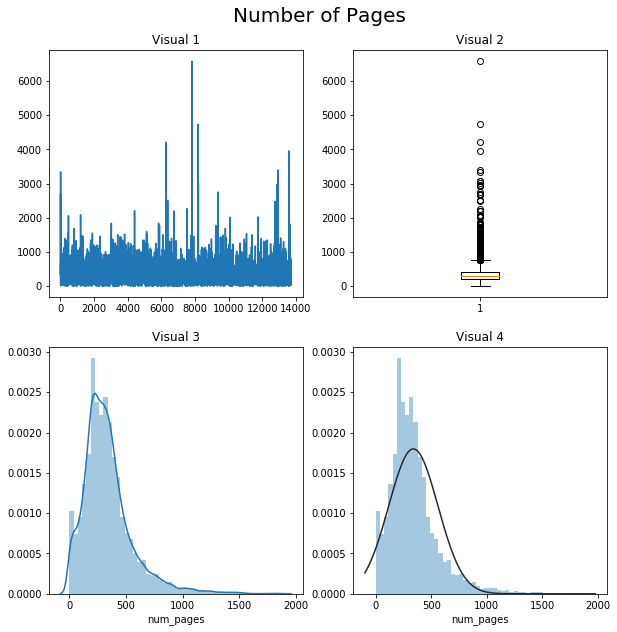

In [226]:
plt.figure(figsize=(10,10))
plt.suptitle('Number of Pages', fontsize=20, y = .94)
plt.subplot(2,2,1, title='Visual 1')
plt.plot(df.num_pages)
plt.subplot(2,2,2, title='Visual 2')
plt.boxplot(df.num_pages)
plt.subplot(2,2,3, title='Visual 3')
sns.distplot(df.num_pages[df.num_pages < 2000], kde=True)
plt.subplot(2,2,4, title='Visual 4')
sns.distplot(df.num_pages[df.num_pages < 2000], kde=False, fit=stats.norm)
plt.show()

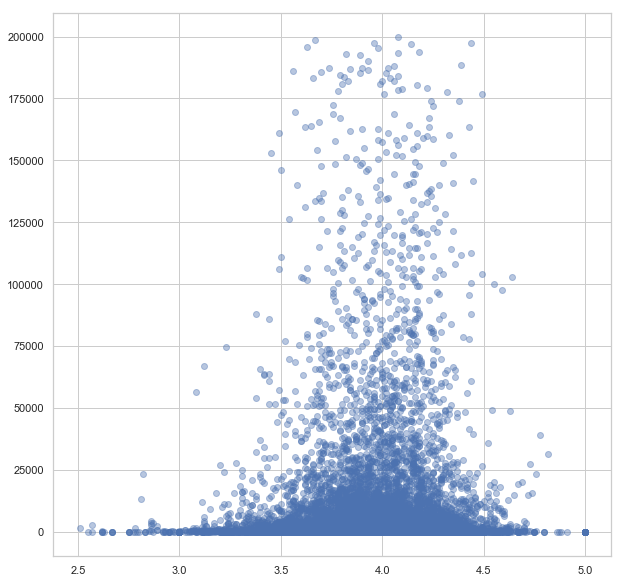

In [329]:
plt.figure(figsize=(10,10))
zoom_df = df[(df.average_rating > 2.5) & (df.ratings_count < 200000)]
plt.scatter(zoom_df.average_rating, zoom_df.ratings_count, alpha = 0.4)
plt.show()

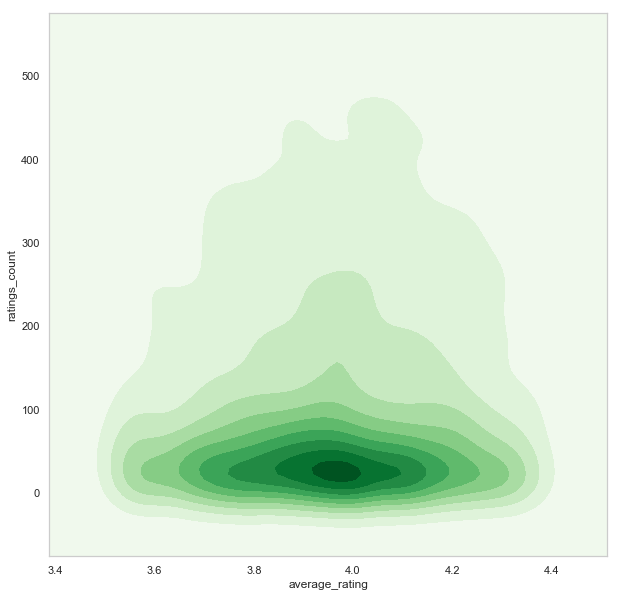

In [330]:
plt.figure(figsize=(10,10))
zoom_df = df[(df.average_rating > 3.5) & (df.ratings_count < 500) & (df.average_rating < 4.4)]
ax = sns.kdeplot(zoom_df.average_rating, zoom_df.ratings_count, shade=True, cmap="Greens")

<Figure size 1152x1152 with 0 Axes>

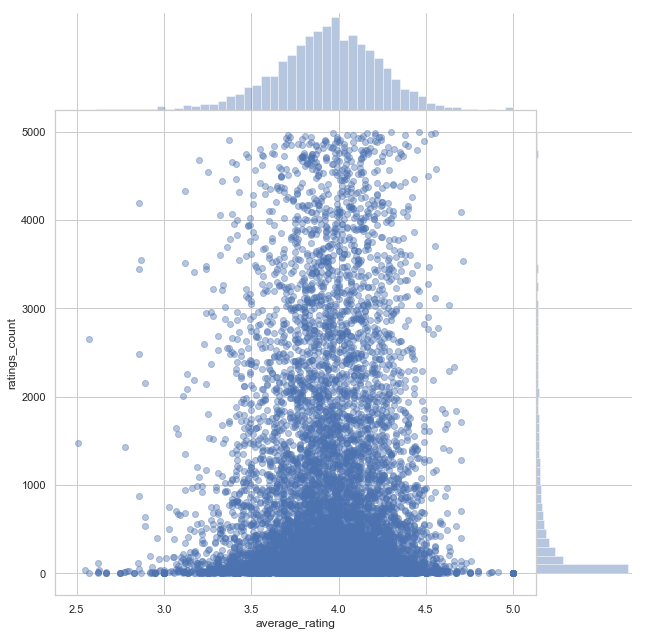

In [327]:
plt.figure(figsize=(16,16))
zoom_df = df[(df.average_rating > 2.5) & (df.ratings_count < 5000)]
g = sns.jointplot(x=zoom_df.average_rating, y=zoom_df.ratings_count, data=zoom_df, height=9, alpha=.4, space = 0)
plt.show()

In [184]:
condensed_codes = []
for i in range(len(df)):
    if df.language_code[i] == 'eng':
        condensed_codes.append('eng')
    else:
        condensed_codes.append('not-eng')
df['condensed_codes'] = condensed_codes

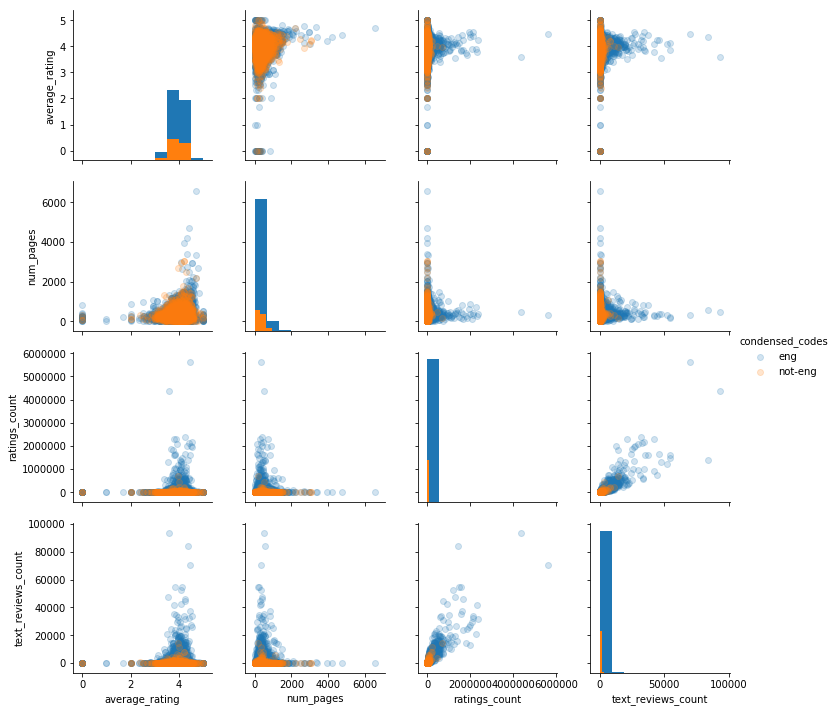

In [185]:
g = sns.PairGrid(df, vars=['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count'], hue='condensed_codes')
g = g.map_offdiag(plt.scatter, alpha=.2)
g = g.map_diag(plt.hist)
g = g.add_legend()
plt.show()

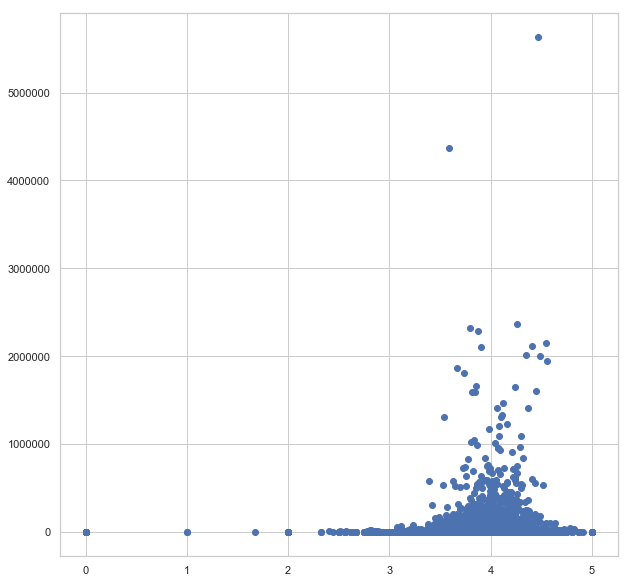

In [328]:
plt.figure(figsize=(10,10))
plt.scatter(df.average_rating, df.ratings_count)
plt.show()

In [251]:
df.head(1)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,condensed_codes
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249,eng


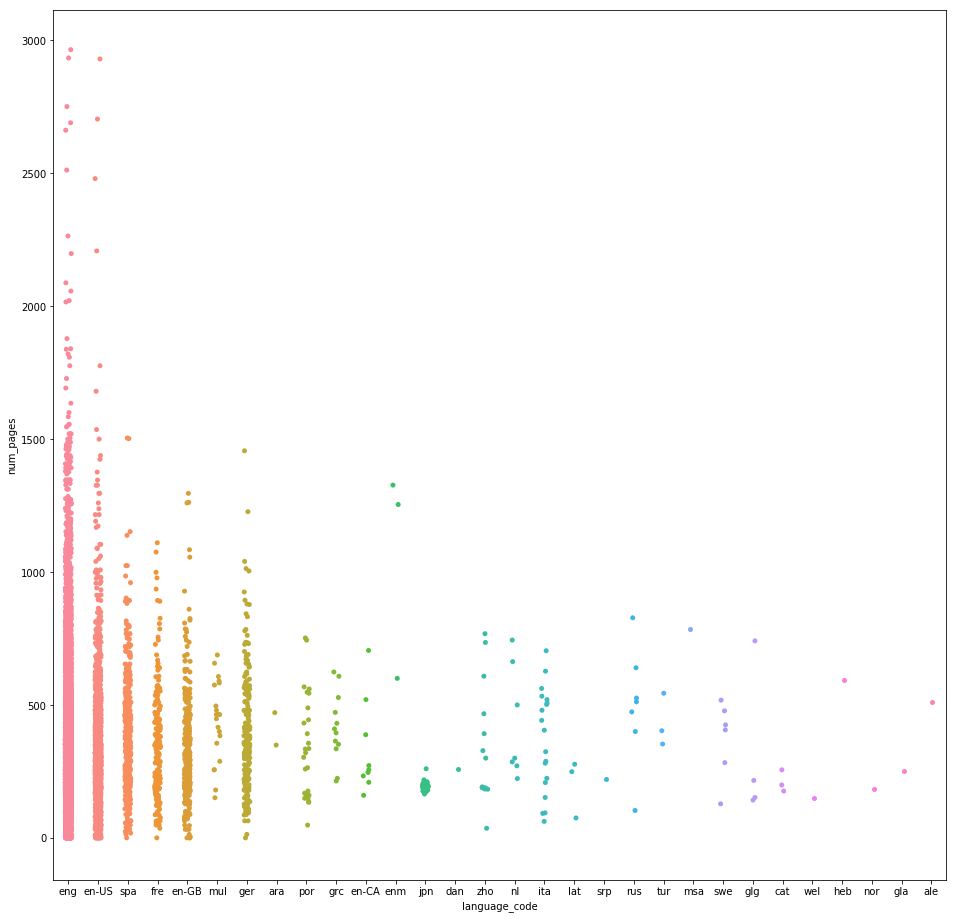

In [259]:
plt.figure(figsize=(16,16))
ax = sns.stripplot(x="language_code", y="num_pages", data=df[df.num_pages < 3000], jitter=True)

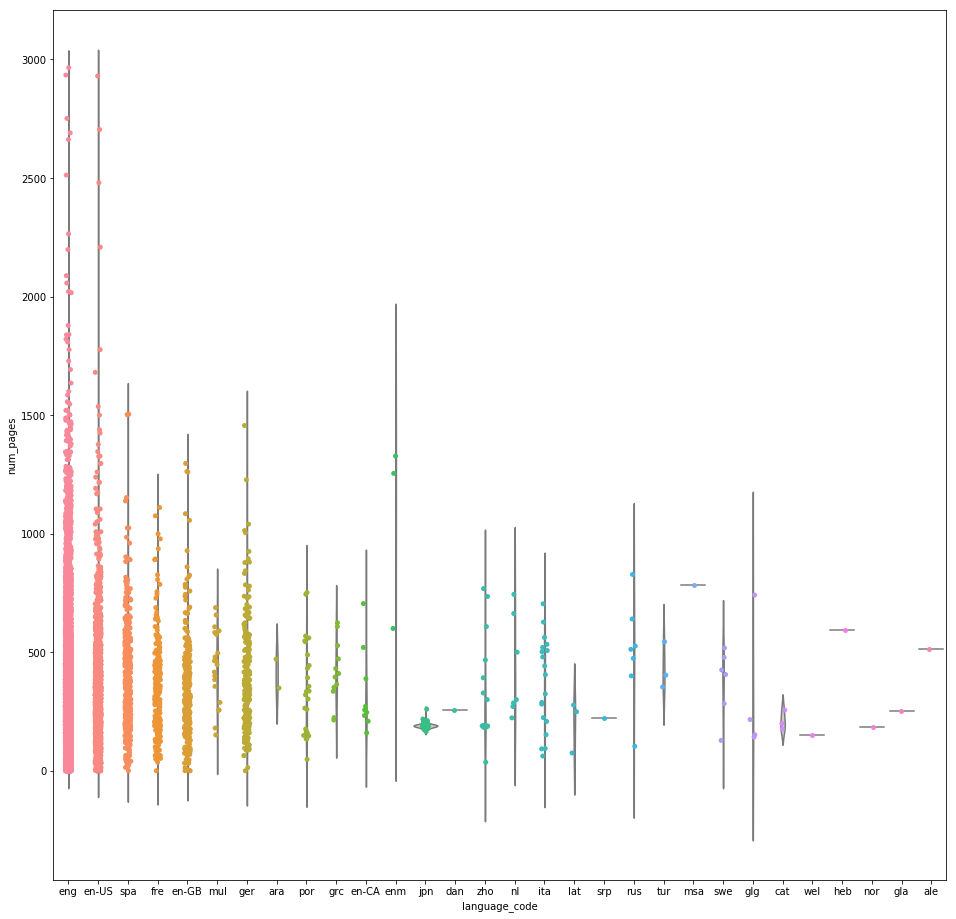

In [268]:
plt.figure(figsize=(16,16))
ax = sns.violinplot(x="language_code", y="num_pages", data=df[df.num_pages < 3000], inner=None, color='.8' )
ax = sns.stripplot(x="language_code", y="num_pages", data=df[df.num_pages < 3000], jitter=True)

In [264]:
df.language_code.unique()

array(['eng', 'en-US', 'spa', 'fre', 'en-GB', 'mul', 'ger', 'ara', 'por',
       'grc', 'en-CA', 'enm', 'jpn', 'dan', 'zho', 'nl', 'ita', 'lat',
       'srp', 'rus', 'tur', 'msa', 'swe', 'glg', 'cat', 'wel', 'heb',
       'nor', 'gla', 'ale'], dtype=object)

In [269]:
condensed_languages = []
for i in df.language_code:
    if i == 'eng':
        condensed_languages.append('English')
    elif i == 'en-US':
        condensed_languages.append('Non-US')
    elif i == 'spa':
        condensed_languages.append('Latin')
    elif i == 'fre':
        condensed_languages.append('Latin')
    elif i == 'en-GB':
        condensed_languages.append('Non-US')
    elif i == 'mul':
        condensed_languages.append('Multiple')
    elif i == 'ger':
        condensed_languages.append('European')
    elif i == 'ara':
        condensed_languages.append('Mid-East')
    elif i == 'por':
        condensed_languages.append('Latin')
    elif i == 'grc':
        condensed_languages.append('Mid-East')
    elif i == 'en-CA':
        condensed_languages.append('Non-US')
    elif i == 'enm':
        condensed_languages.append('Old')
    elif i == 'jpn':
        condensed_languages.append('Asian')
    elif i == 'dan':
        condensed_languages.append('European')
    elif i == 'zho':
        condensed_languages.append('Asian')
    elif i == 'nl':
        condensed_languages.append('European')
    elif i == 'ita':
        condensed_languages.append('Latin')
    elif i == 'lat':
        condensed_languages.append('Old')
    elif i == 'srp':
        condensed_languages.append('Mid-East')
    elif i == 'rus':
        condensed_languages.append('European')
    elif i == 'tur':
        condensed_languages.append('Mid-East')
    elif i == 'msa':
        condensed_languages.append('Asian')
    elif i == 'swe':
        condensed_languages.append('European')
    elif i == 'glg':
        condensed_languages.append('European')
    elif i == 'cat':
        condensed_languages.append('Latin')
    elif i == 'wel':
        condensed_languages.append('European')
    elif i == 'heb':
        condensed_languages.append('Mid-East')
    elif i == 'nor':
        condensed_languages.append('European')
    elif i == 'gla':
        condensed_languages.append('European')
    elif i == 'ale':
        condensed_languages.append('Asian')

In [300]:
print(len(df[df.condensed_codes == 'eng']))
print(len(df[df.condensed_codes == 'not-eng']))
print(len(df[df.condensed_language == 'European']))
print(len(df[df.condensed_language == 'Mid-East']))
print(len(df[df.condensed_language == 'Asian']))
print(len(df[df.condensed_language == 'Old']))

10594
3120
266
19
82
6


In [272]:
df['condensed_language'] = condensed_languages

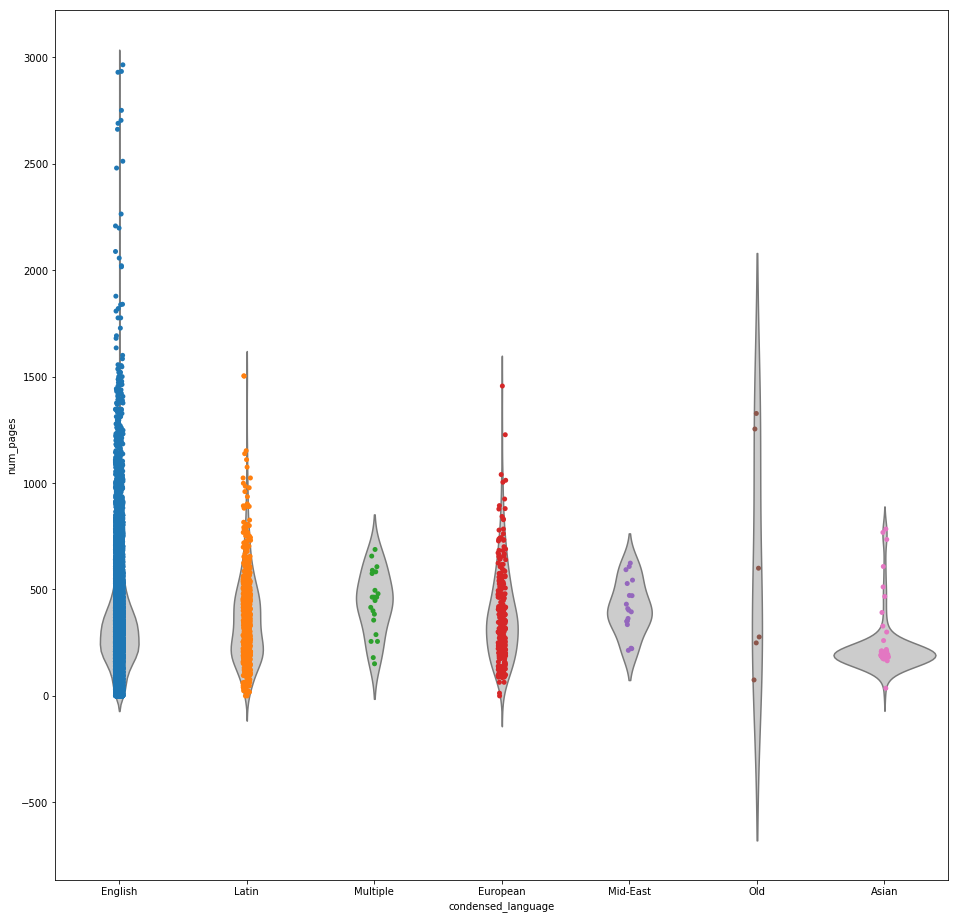

In [276]:
plt.figure(figsize=(16,16))
ax = sns.violinplot(x="condensed_language", y="num_pages", data=df[df.num_pages < 3000], inner=None, color='.8' )
ax = sns.stripplot(x="condensed_language", y="num_pages", data=df[df.num_pages < 3000], jitter=.03)

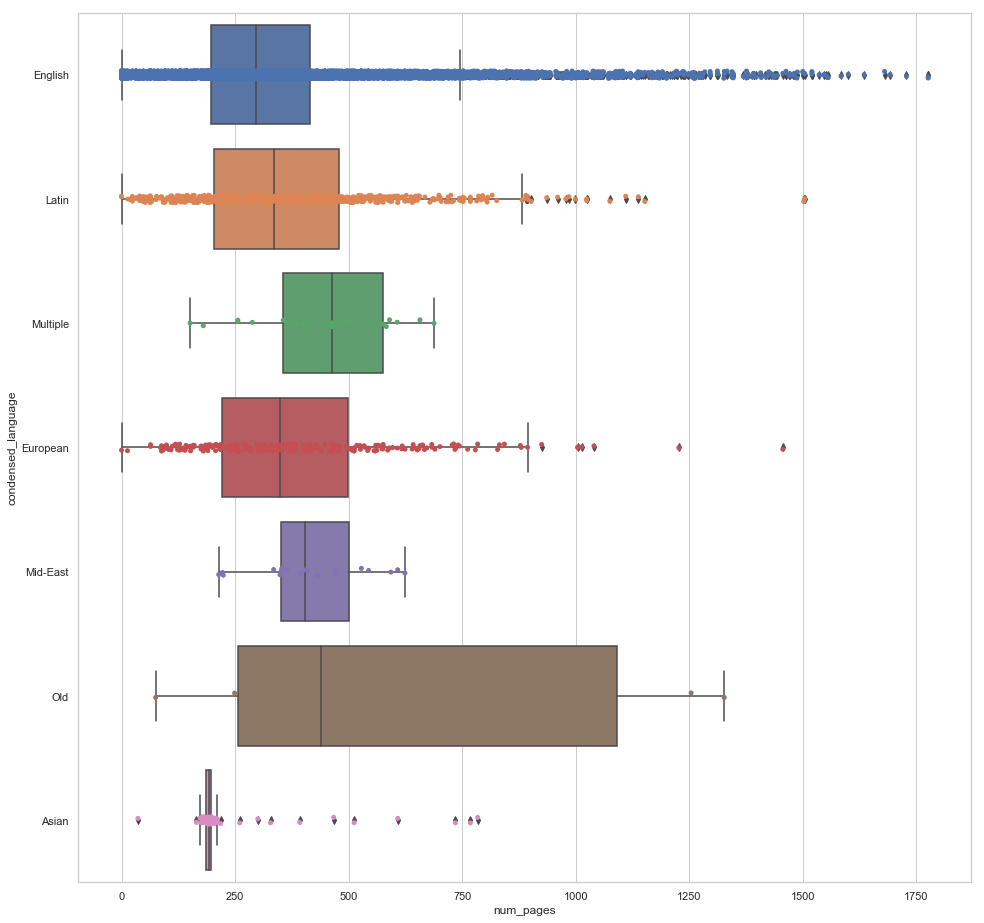

In [331]:
plt.figure(figsize=(16,16))
sns.set(style='whitegrid')
ax = sns.boxplot(y="condensed_language", x="num_pages", data=df[df.num_pages < 1800])
ax = sns.stripplot(y="condensed_language", x="num_pages", data=df[df.num_pages < 1800], jitter=.03)

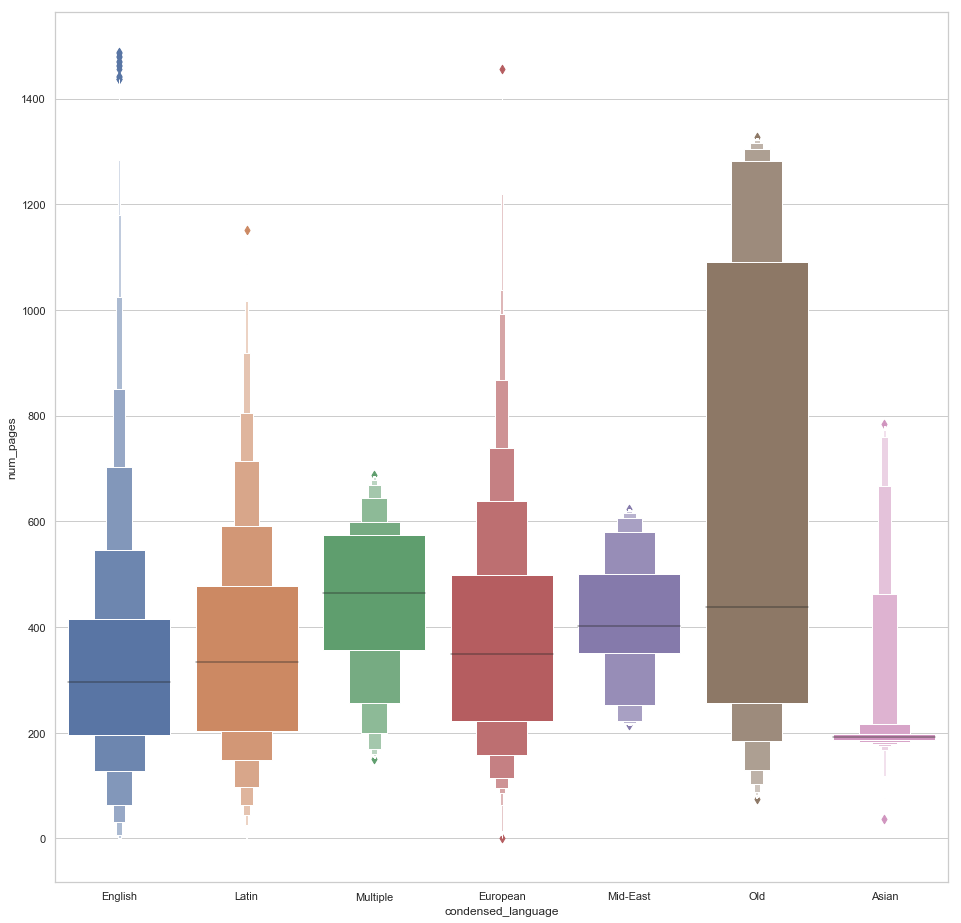

In [288]:
plt.figure(figsize=(16,16))
ax = sns.boxenplot(x="condensed_language", y="num_pages", data=df[df.num_pages < 1500])

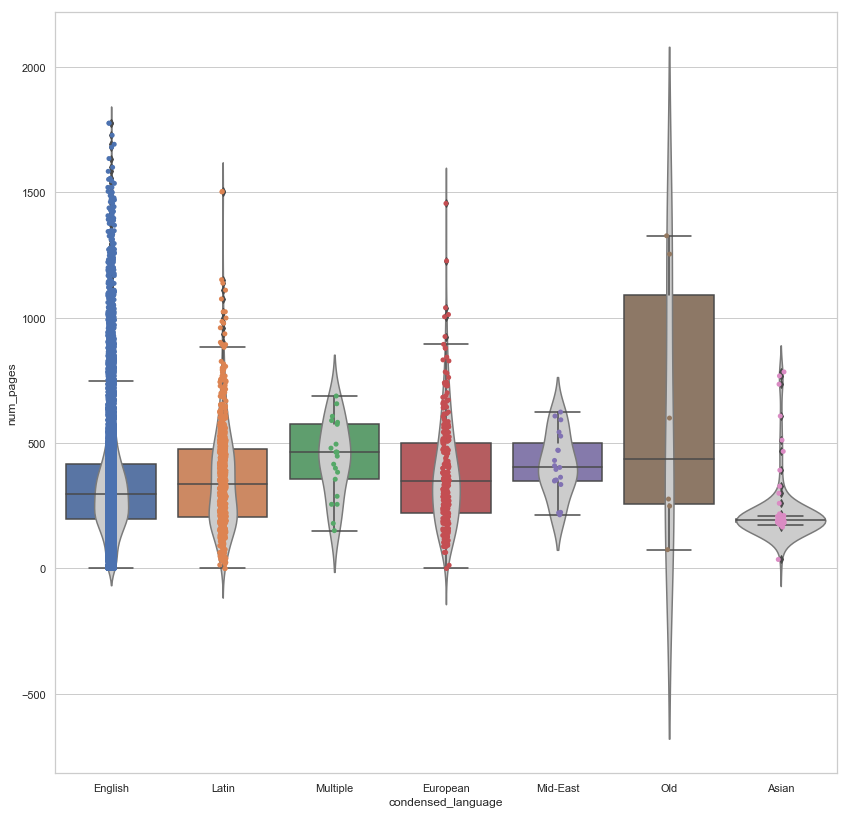

In [291]:
plt.figure(figsize=(14,14))
sns.set(style='whitegrid')
ax = sns.boxplot(x="condensed_language", y="num_pages", data=df[df.num_pages < 1800])
ax = sns.stripplot(x="condensed_language", y="num_pages", data=df[df.num_pages < 1800], jitter=.03)
ax = sns.violinplot(x="condensed_language", y="num_pages", data=df[df.num_pages < 1800], inner=None, color='.8' )

In [293]:
df.head(1)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,condensed_codes,condensed_language
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249,eng,English


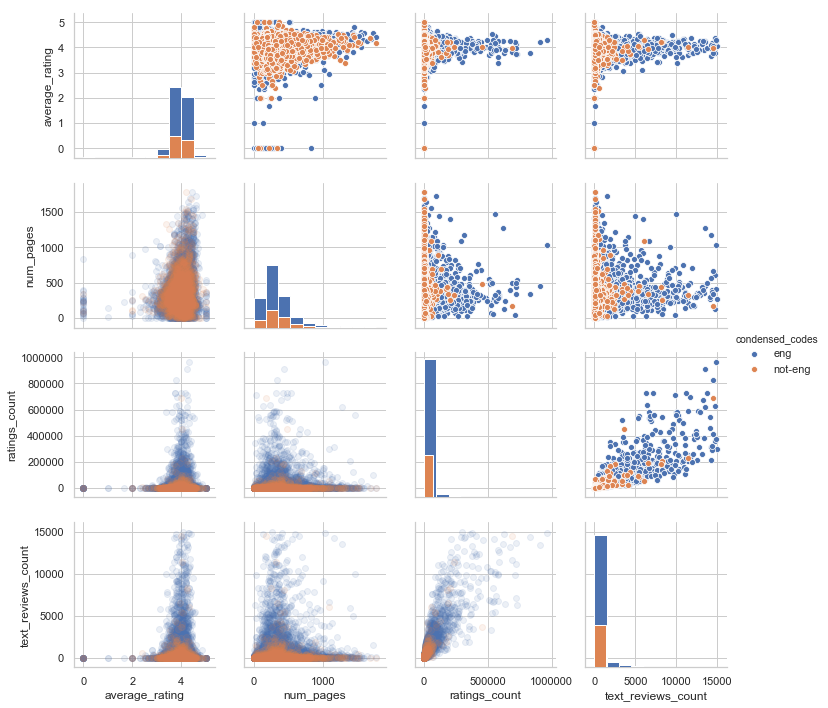

In [312]:
g = sns.PairGrid(df[(df.num_pages < 1800) & (df.text_reviews_count < 15000) & (df.ratings_count < 1000000)],
                 vars=['average_rating','num_pages','ratings_count','text_reviews_count'], hue="condensed_codes")
g = g.map_diag(plt.hist)
g = g.map_lower(plt.scatter, alpha=.1)
g = g.map_upper(sns.scatterplot)
g = g.add_legend()